<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>

[中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [हिन्दी](https://docs.ultralytics.com/hi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/166.8 GB disk)


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 24.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 41.5ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 60.0ms
Speed: 0.5ms pre-process, 50.8ms inference, 37.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:12<00:00, 66.6MB/s]


In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2024.59it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:25<00:00,  1.84it/s]
                   all       5000      36335      0.671      0.519      0.566      0.371
Speed: 0.1ms pre-process, 3.1ms inference, 2.3ms NMS per image at shape (32,

# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Label a dataset on Roboflow (optional)

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

2023-04-09 14:11:38.063605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 14:11:39.026661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_inter

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://docs.ultralytics.com/yolov5/tutorials/comet_logging_integration). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://docs.ultralytics.com/yolov5/tutorials/clearml_logging_integration) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices.

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/google_cloud_quickstart_tutorial/)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/aws_quickstart_tutorial/)
- **Docker Image**. See [Docker Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/docker_image_quickstart_tutorial/) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

In [ ]:
import random
import shutil
import os
import torch
import numpy as np
import matplotlib.patches as patches
import re
from collections import Counter
import matplotlib.pyplot as plt
from glob import glob
import json
import xml.etree.ElementTree as xet

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

# Storing ID of current CUDA device
cuda_id = torch.cuda.current_device()
print(f"ID of current CUDA device:{torch.cuda.current_device()}")

print(f"Name of current CUDA device: {torch.cuda.get_device_name(cuda_id)}")
print(f"How many devices {torch.cuda.device_count()}")

Посмотрим какие разрешения бывают у наших файлов:

In [2]:
arr = []
for i in range(1, 4):
    for dir1 in ['test', 'train', 'valid', 'annotations', 'images']:
        arr += list(map(lambda x: x[-4:],glob(f'./data/Data{i}/{dir1}/*')))
print(set(arr))

{'.jpg', '.xml', '.png'}


In [3]:
Counter(arr)

Counter({'.xml': 2421, '.jpg': 1988, '.png': 433})

Сначала все файлы объединим в одной папке

In [4]:
os.makedirs('./data/extracted/images', exist_ok=True)
os.makedirs('./data/extracted/annotations', exist_ok=True)
for i in range(1, 4):
    for dir1 in ['test', 'train', 'valid', 'annotations', 'images']:
        for filename in glob(f'./data/Data{i}/{dir1}/*'):
            if filename.endswith('.png'):
                shutil.copy(filename,f'./data/extracted/{os.path.basename(filename)[:-4] + ".jpg"}')
            else:
                shutil.copy(filename,'./data/extracted')

И объединим в соответствующие директории по расширениям

In [5]:
for filename in glob(f'./data/extracted/*.*'):
    if filename.endswith('.jpg'):
        shutil.move(filename,'./data/extracted/images')
    else:
        shutil.move(filename,'./data/extracted/annotations')
os.makedirs('./data/extracted/labels', exist_ok=True)

In [65]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
%cd ../

D:\Github proj\MachineLearning\ML\Neuro-webs_competition\road_holes\proj\yolov5


Cloning into 'yolov5'...


D:\Github proj\MachineLearning\ML\Neuro-webs_competition\road_holes\proj


In [14]:
for dir1 in ['train', 'val']:
    for dir2 in ['images', 'labels']:
        files = glob(f'./data/exported_data/splitted/{dir1}/{dir2}/*')
        for f in files:
            os.remove(f)

In [10]:
import yaml

data = {
    'train': r'..\data\exported_data\splitted\train',
    'val': r'..\data\exported_data\splitted\val',
    'nc': '5',
    'names': {0: 'D00', 1: 'D10', 2: 'D20', 3: 'D40', 4: 'Repair'}
}
with open('./yolov5/data/dataset.yaml', 'w', ) as f:
    yaml.dump(data, f, sort_keys=False)

In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [1]:
%cd yolov5
!echo %cd%
!python train.py --img 720 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --nosave --cache --workers 0
%cd ../

D:\Github proj\MachineLearning\ML\Neuro-webs_competition\road_holes\proj\B\yolov5
D:\Github proj\MachineLearning\ML\Neuro-webs_competition\road_holes\proj\B\yolov5
^C
D:\Github proj\MachineLearning\ML\Neuro-webs_competition\road_holes\proj\B


In [4]:
def predict(images_path, weights_path):
    os.system(
        f"""
            python yolov5/detect.py --source {images_path} --weights {weights_path}
        """)

predict(images_path = "./data/corrupted/images",
        weights_path = "./yolov5/runs/train/exp5/weights/best.pt")

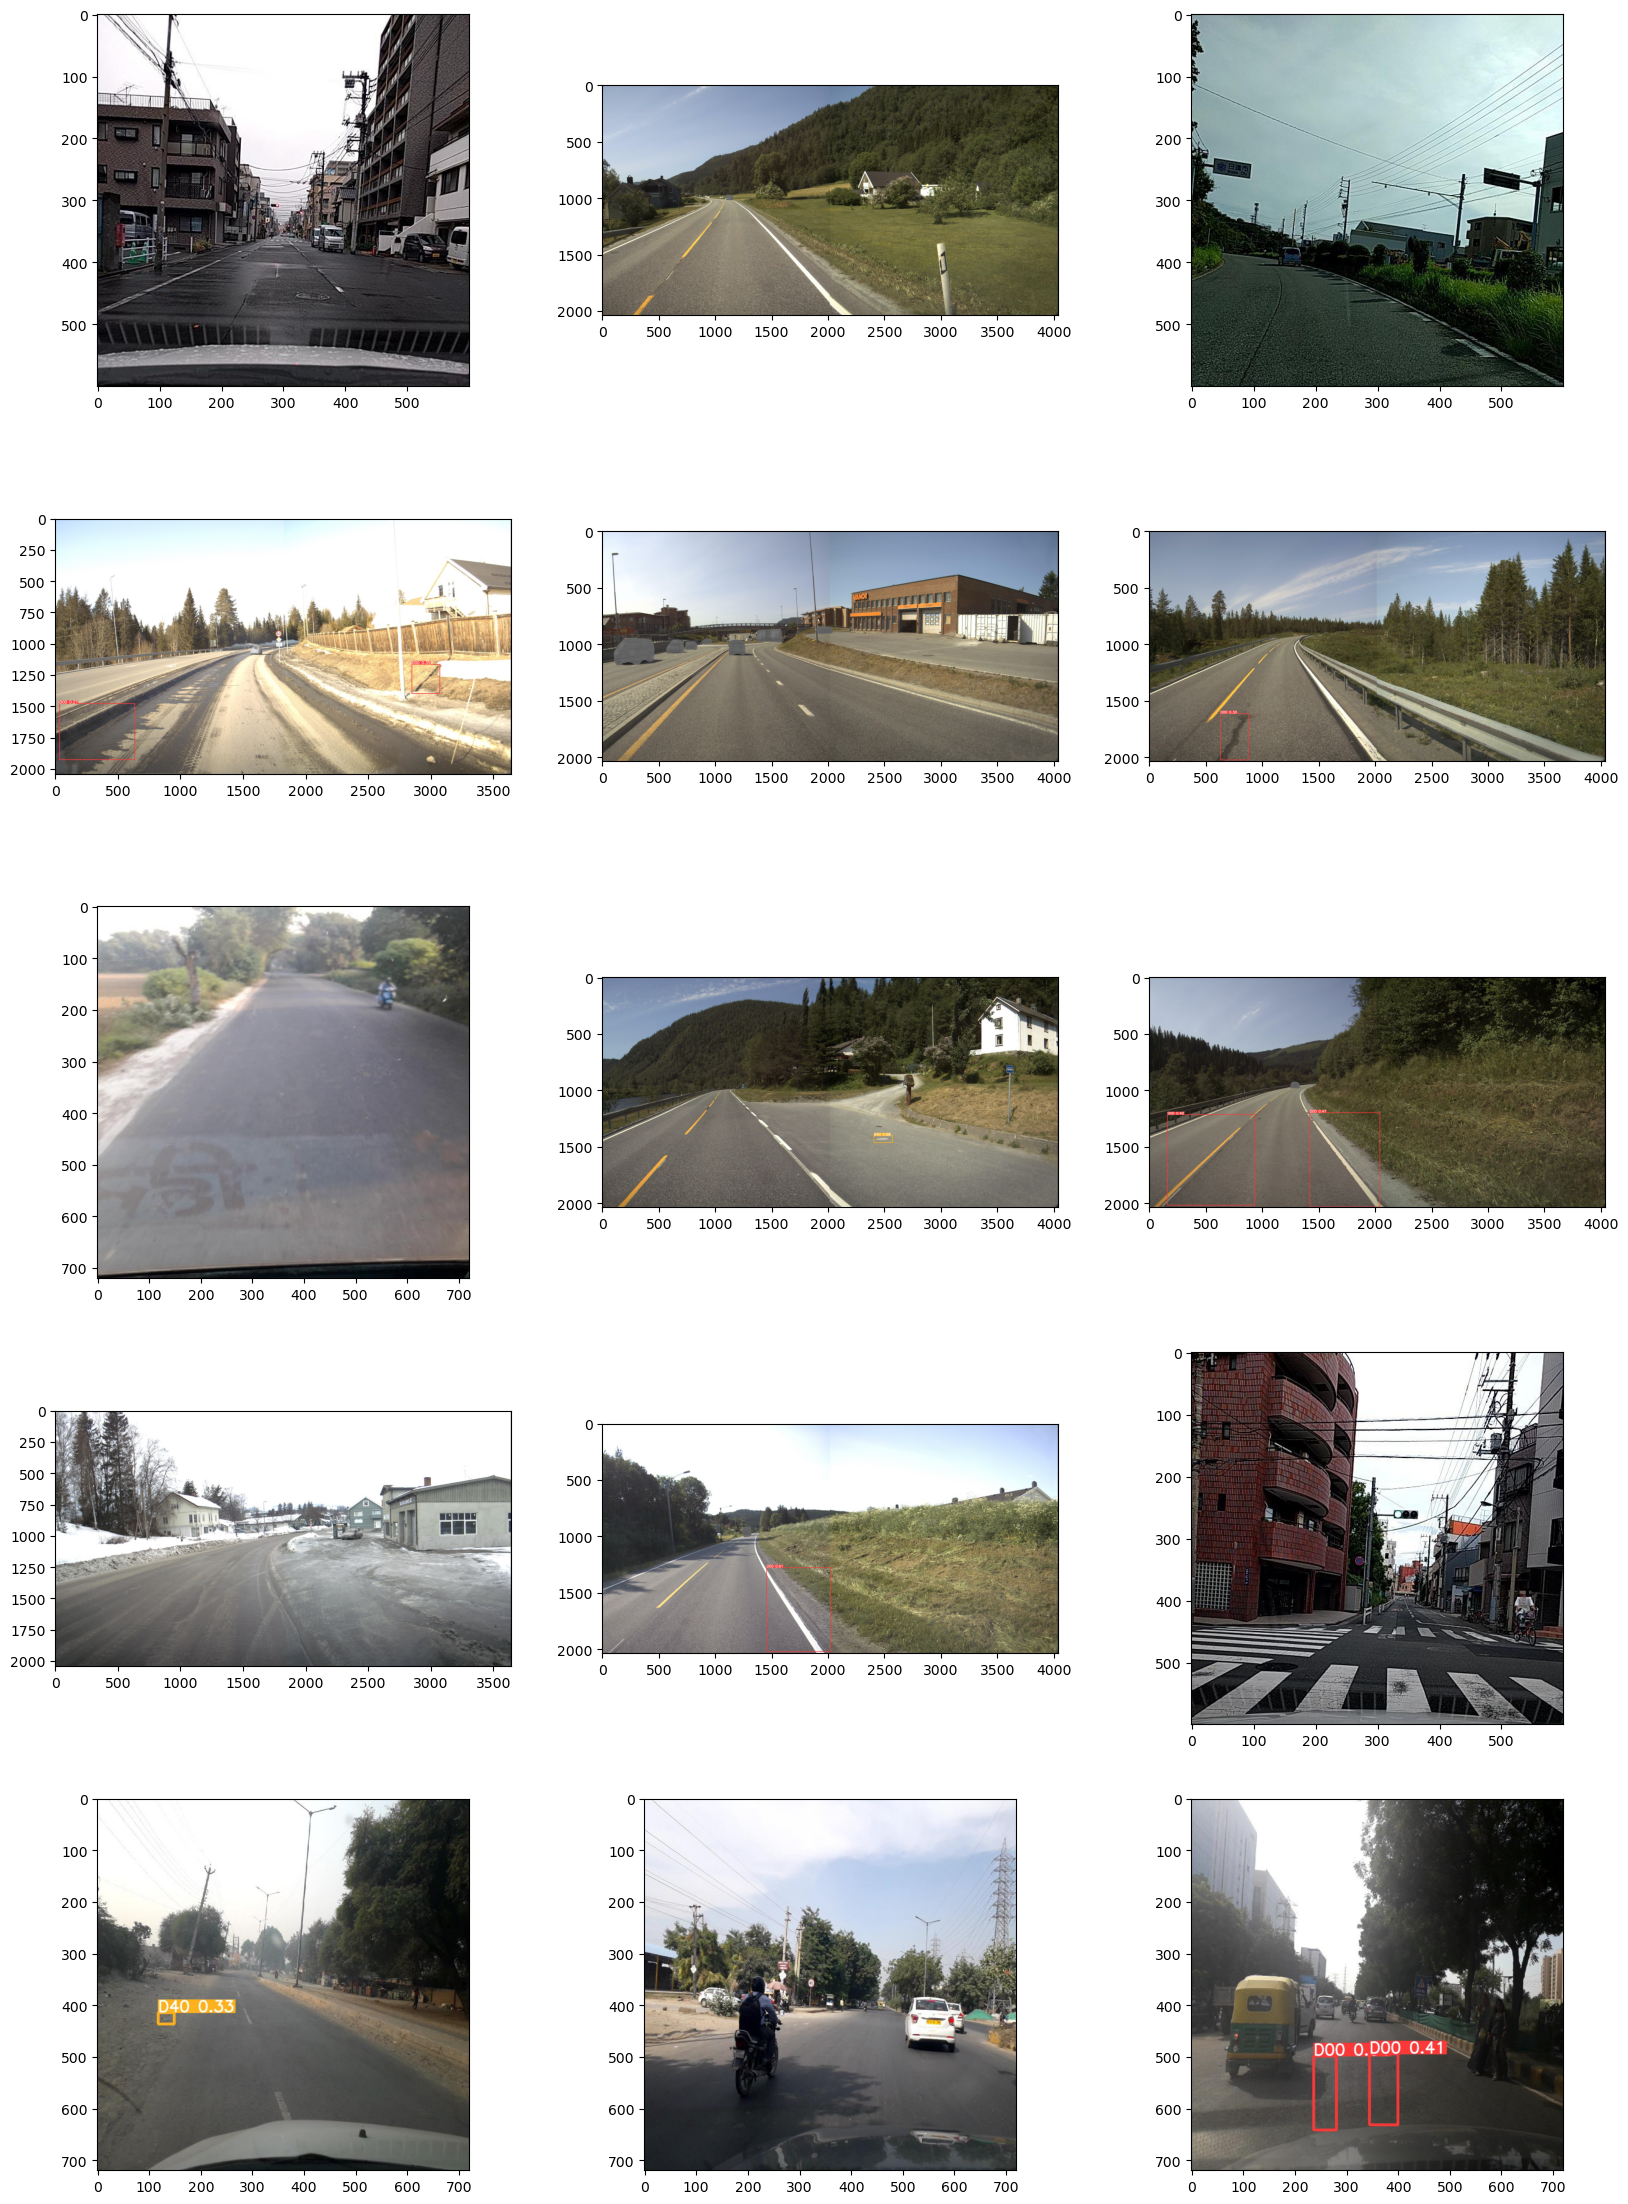

In [7]:
disp_images = glob(r'.\yolov5\runs\detect\exp\*')
fig=plt.figure(figsize=(20, 28))
columns = 3
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.choice(disp_images)
    img = plt.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [7]:
from tqdm import tqdm
model = torch.hub.load('ultralytics/yolov5','custom', path = './yolov5/runs/train/exp5/weights/best.pt')
img_names = os.listdir('./data/corrupted/images')
img = plt.imread(os.path.join('./data/corrupted/images',img_names[4]))
results = model(img)
print(results)
results.xyxy[0]

Using cache found in C:\Users\nicka/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-5 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 720x720 1 D20
Speed: 4.0ms pre-process, 4.0ms inference, 40.0ms NMS per image at shape (1, 3, 640, 640)


tensor([[5.06999e+01, 5.20780e+02, 5.59982e+02, 7.14762e+02, 2.84864e-01, 2.00000e+00]], device='cuda:0')

# ResNet18

In [3]:
licenses = list(map(lambda x: os.path.basename(x)[os.path.basename(x).find('_') + 1:os.path.basename(x).find('_',
                                                                                                             os.path.basename(
                                                                                                                 x).find(
                                                                                                                 '_') + 1)],
                    glob('./data/cropped/*.jpg')))
licenses = [license for license in licenses if license != 'noPlate']
licenses_dict = Counter(''.join(licenses))
all_sumbols = dict(sorted(licenses_dict.items()))
all_sumbols

{'0': 126,
 '1': 93,
 '2': 83,
 '3': 109,
 '4': 81,
 '5': 64,
 '6': 107,
 '7': 431,
 '8': 86,
 '9': 356,
 'A': 56,
 'B': 85,
 'C': 89,
 'E': 53,
 'H': 79,
 'K': 108,
 'M': 59,
 'O': 47,
 'P': 30,
 'T': 76,
 'X': 59,
 'Y': 45}

In [4]:
ALL_CHAR_SET = list(all_sumbols.keys()) + ['_']  # Добавляем пропуск т.к. у нас бывают разные авто номера
ALL_CHAR_SET_LEN = len(ALL_CHAR_SET)
print(ALL_CHAR_SET, ALL_CHAR_SET_LEN, sep='\n')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y', '_']
23


In [5]:
MAX_LEN_LICENSE = max(list(map(len, licenses)))
MAX_LEN_LICENSE

9

In [26]:
def encode(a):
    onehot = [0] * ALL_CHAR_SET_LEN
    idx = ALL_CHAR_SET.index(a)
    onehot[idx] += 1
    return onehot


encode('_')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [40]:
class Mydataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.img = os.listdir(self.path)
        # if is_train:
        #     self.img = os.listdir(self.path)[:250]
        # else:
        #     self.img = os.listdir(self.path)[251:]
        self.transform = transform

    def __getitem__(self, idx):
        img_name = self.img[idx]
        img = Image.open(os.path.join(self.path, img_name))
        img = img.convert('L')
        label = img_name[img_name.find('_') + 1:img_name.find('_', img_name.find('_') + 1)]
        while len(label) < 9:
            label += '_'
        label_oh = []
        for i in label:
            label_oh += encode(i)
        if self.transform is not None:
            img = self.transform(img)
        return img, np.array(label_oh), label

    def __len__(self):
        return len(self.img)


transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
])

train_ds = Mydataset('./data/cropped/train', transform=transform)
test_ds = Mydataset('./data/cropped/test', transform)
train_dl = DataLoader(train_ds, batch_size=64, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=1, num_workers=0)
val_dl = DataLoader(test_ds, batch_size=64, num_workers=0)

In [41]:
model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Linear(512, 256, bias=True)

model = nn.Sequential(model,
                      nn.LeakyReLU(0.2),
                      nn.Linear(256, ALL_CHAR_SET_LEN * MAX_LEN_LICENSE, bias=True))

model.cuda()
loss_func = nn.MultiLabelSoftMarginLoss()
optm = torch.optim.Adam(model.parameters(), lr=0.003)

In [42]:
for epoch in range(20):
    for step, i in enumerate(train_dl):
        img, label_oh, label = i
        img = img.cuda()
        label_oh = label_oh.float().cuda()
        pred = model(img)
        loss = loss_func(pred, label_oh)
        # print(pred)
        # print(label)
        optm.zero_grad()
        loss.backward()
        optm.step()
        print('epoch:', epoch + 1, 'step:', step + 1, 'loss:', loss.item())
        if epoch % 3 == 0 and step == 2:
            img, label_oh, label = next(iter(val_dl))
            img = img.cuda()
            label_oh = label_oh.float().cuda()
            pred = model(img)
            loss = loss_func(pred, label_oh)
            print('test loss: ', loss.item())

epoch: 1 step: 1 loss: 0.7005746960639954
epoch: 1 step: 2 loss: 0.5500198602676392
epoch: 1 step: 3 loss: 0.2799127697944641
test loss:  0.18151254951953888
epoch: 1 step: 4 loss: 0.17975939810276031
epoch: 2 step: 1 loss: 0.1941060721874237
epoch: 2 step: 2 loss: 0.16778354346752167
epoch: 2 step: 3 loss: 0.14268803596496582
epoch: 2 step: 4 loss: 0.13328003883361816
epoch: 3 step: 1 loss: 0.15816104412078857
epoch: 3 step: 2 loss: 0.14525820314884186
epoch: 3 step: 3 loss: 0.1394525021314621
epoch: 3 step: 4 loss: 0.12512613832950592
epoch: 4 step: 1 loss: 0.1419423669576645
epoch: 4 step: 2 loss: 0.13258366286754608
epoch: 4 step: 3 loss: 0.1300671398639679
test loss:  0.13086827099323273
epoch: 4 step: 4 loss: 0.1213398277759552
epoch: 5 step: 1 loss: 0.1365700364112854
epoch: 5 step: 2 loss: 0.12828709185123444
epoch: 5 step: 3 loss: 0.1241319552063942
epoch: 5 step: 4 loss: 0.11529464274644852
epoch: 6 step: 1 loss: 0.1339985728263855
epoch: 6 step: 2 loss: 0.12569189071655273
e

In [43]:
model.eval()

Sequential(
  (0): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [58]:
for step, (img, label_oh, label) in enumerate(test_dl):
    img = img.cuda()
    pred = model(img)
    # for i in range(MAX_LEN_LICENSE):
    #     if i == 0:
    #         exec(f'c0 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[0:ALL_CHAR_SET_LEN])]')
    #     else:
    #         print(ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*i:ALL_CHAR_SET_LEN*i+1])])
    #         exec(f'c{i} = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN*{i}:ALL_CHAR_SET_LEN*{i}+1])]')
    # c = '%s'*9 % (c0,c1,c2,c3,c4,c5,c6,c7,c8)
    c0 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[0:ALL_CHAR_SET_LEN])]
    c1 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN:ALL_CHAR_SET_LEN * 2])]
    c2 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN * 2:ALL_CHAR_SET_LEN * 3])]
    c3 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN * 3:ALL_CHAR_SET_LEN * 4])]
    c4 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN * 4:ALL_CHAR_SET_LEN * 5])]
    c5 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN * 5:ALL_CHAR_SET_LEN * 6])]
    c6 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN * 6:ALL_CHAR_SET_LEN * 7])]
    c7 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN * 7:ALL_CHAR_SET_LEN * 8])]
    c8 = ALL_CHAR_SET[np.argmax(pred.squeeze().cpu().tolist()[ALL_CHAR_SET_LEN * 8:ALL_CHAR_SET_LEN * 9])]
    c = '%s%s%s%s%s%s%s%s%s' % (c0, c1, c2, c3, c4, c5, c6, c7, c8)

    print('label:', label[0], 'pred:', c)

label: M093BB799 pred: H309TC797
label: C280BK799 pred: H309TC797
label: K994BB799 pred: M381TC797
label: X580YK163 pred: Y683TC797
label: E640KK164 pred: H309TC797
label: H375TC777 pred: M381TC799
label: A157CB57_ pred: T362TO777
label: Y116AT777 pred: K381TC797
label: P136OM79_ pred: M381TC797
label: C280BK799 pred: M381TC777
label: T253OX199 pred: Y386TA797
label: C779EM62_ pred: H389TC799
label: E637AK977 pred: M389TC797
label: A777PB197 pred: H309TC797
label: T087HA790 pred: K362TB777
label: M983HH799 pred: Y309TC797
label: E302AM977 pred: K364TB777
label: P418YP799 pred: M389TC797
label: O480MX797 pred: H380TK779
label: E163AE977 pred: H309TC797
label: K776HC790 pred: M381TC797
label: X885YB799 pred: T362TO777
label: E163AE977 pred: Y309TC797
label: X926TO777 pred: K364TK797
label: Y329PO799 pred: K362TB777
label: Y329PO799 pred: K362TB777
label: K495EH763 pred: H280TK779
label: M072XB799 pred: K362TB777
label: B838MX799 pred: K362TB777
label: P969HE799 pred: H389TK797
label: Y83

# Получение фото

### Получение из видео

In [30]:
os.mkdir('./frames_capture')

In [31]:
import cv2
cam = cv2.VideoCapture(0)
cv2.namedWindow("test")
img_counter = 0
while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "./frames_capture/opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
cam.release()
cv2.destroyAllWindows()

./frames_capture/opencv_frame_0.png written!
./frames_capture/opencv_frame_1.png written!
./frames_capture/opencv_frame_2.png written!
./frames_capture/opencv_frame_3.png written!
Escape hit, closing...


In [ ]:
import cv2
import streamlit as st
import torch
import numpy as np
import easyocr
from PIL import Image

def predictions(img):
    model = torch.hub.load('ultralytics/yolov5', 'custom', path='./best.pt')
    preds = model(img)
    if not preds.xyxy[0].nelement() == 0:
        results = list(map(lambda x: int(round(x, 0)), preds.xyxy[0][0].detach().cpu().numpy()))
        img = img[results[1]:results[3], results[0]:results[2]]

        reader = easyocr.Reader(['en', 'ru'], gpu=True)
        _, text, __ = reader.readtext(img)[0]
        return text


st.header("Программа для распознавания номеров авто")
img_file_buffer = st.camera_input("Сделайте фото если возможно")
st.write("Либо")
uploaded_file = st.file_uploader("Загрузите изображение")
if img_file_buffer is not None:
    img = np.array(Image.open(img_file_buffer))
    pred = predictions(img)
    st.write('Результат:')
    st.write(pred)
try:
    if uploaded_file is not None:
        img = np.array(Image.open(uploaded_file))
        pred = predictions(img)
        st.write('Результат:')
        st.write(pred)
except:
    st.write('Что-то пошло не так :(')

апи

In [3]:
import cv2
import time
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)
model = torch.hub.load('ultralytics/yolov5','custom', path = './yolov5/runs/train/exp33/weights/best.pt')
classes_dict = {0: 'D00', 1: 'D10', 2: 'D20', 3: 'D40', 4: 'Repair'}

frame_rate = 33
prev = 0

if vc.isOpened():
    rval, frame = vc.read()
else:
    rval = False

while rval:
    time_elapsed = time.time() - prev
    rval, frame = vc.read()

    if time_elapsed > 1./frame_rate:
        prev = time.time()
        results = model(frame)
        for box in results.xyxy[0]:
            box_class = box[-1]
            box_data = list(map(int,[box[0],box[1],box[2],box[3]]))
            frame = cv2.rectangle(frame, (box_data[0],box_data[3]), (box_data[2],box_data[1]), (255, 0, 0) , 2)
            
            font                   = cv2.FONT_HERSHEY_SIMPLEX
            bottomLeftCornerOfText = (box_data[0],box_data[1]-2)
            fontScale              = 1
            fontColor              = (255,0,0)
            thickness              = 2
            lineType               = 2
            cv2.putText(frame,f'{classes_dict[int(box_class)]} - {round(float(box[-2]),5)}',
                        bottomLeftCornerOfText,
                        font,
                        fontScale,
                        fontColor,
                        thickness,
                        lineType)
        cv2.imshow("preview", frame)
        
    key = cv2.waitKey(20)
    if key == 27:
        break

vc.release()
cv2.destroyWindow("preview")

Using cache found in C:\Users\nicka/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-2-5 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
import unittest
from Calculator import Calculator
#Test cases to test Calulator methods
#You always create  a child class derived from unittest.TestCase
class TestCalculator(unittest.TestCase):
  #setUp method is overridden from the parent class TestCase
  def setUp(self):
    self.calculator = Calculator()
  #Each test method starts with the keyword test_
  def test_add(self):
    self.assertEqual(self.calculator.add(4,7), 11)
  def test_subtract(self):
    self.assertEqual(self.calculator.subtract(10,5), 5)
  def test_multiply(self):
    self.assertEqual(self.calculator.multiply(3,7), 21)
  def test_divide(self):
    self.assertEqual(self.calculator.divide(10,2), 5)
# Executing the tests in the above test case class
if __name__ == "__main__":
  unittest.main()